#Deep learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

###En el siguiente Coolab se da una pequeña introduccion a pandas library

In [ ]:
#importamos pandas
from __future__ import print_function

import pandas as pd
import numpy as np
pd.__version__

'1.0.5'

##Series

In [ ]:
a=pd.Series([1,3,5,6,7,7])
a=pd.Series([1,2,4,5],dtype=np.integer) #tambien podemos usar numpy para especificar el typo de dato
print("El primer elemento: \n",a[0])
print("El ultimo elemento: \n",a[a.size-1])
a[0]=22 #asignando un valor
print("asignando un valor: \n",a)

a=pd.Series([1,2,4,5],dtype=np.integer,index=['a','b','c','d']) #tambien podemos asignar los indices
print("Con indices: \n",a)
print("accediendo al indice a: \n",a['a']) #tambien funciona con a[0]

dicc={'a':22,'b':333,'c':44}
a=pd.Series(dicc)# tambien se pueden asignar diccionarios

a=pd.Series(np.arange(4),index=['a','b','c','d'],dtype=np.float32) #tambien podemos usar un array de numpy
print("Serie hecha con numpy: \n",a)

#tambien podemos darle nombre a las series
a.name='serie1
a.index #indices de la serie
a.index.values #valores de los indices
a.index.tolist() #convertimos los indices en listas
a.index.name='indices1' #podemos darle nombre a la columna de indices

In [ ]:
#operaciones con series
a=pd.Series(np.random.randint(0,10,4)*10,index=np.arange(4),dtype=np.float32)
print("multiplicacion de escalar: \n",a*100)
print("division de escalar: \n",a/100)
print("suma de escalar: \n",a+100)
print("resta de escalar: \n",a-100)
print("serie con los valores mayores a 20: \n",a[a>10])

In [ ]:
#valores nulos
a[5]=np.NaN
np.isnan(a[5]) 
np.nan==None #False
np.nan==np.nan #False
print("Serie de valores booleanos determinando un elemento nulo: \n",pd.isnull(a)) #a.isnull() tambien funciona
print("Serie de valores booleanos determinando un elemento no nulo: \n",pd.notnull(a)) #a.notnull() tambien funciona
print("Serie sin valores nulos: \n",a[a.notnull()])
print("Sub-serie con valores no nulos: \n",a.dropna())
print("Sub-serie con valores no nulos: \n",a.fillna("yanoesnulo")) #llena los valores nulos con un valor

In [ ]:
#querys
sports={'futbol':'brasil','boleivol':'españa','powerlifting':'EEUU'}
a=pd.Series(sports)
print('valor 3 \n',a.iloc[2])
print('valor 3 \n',a[2])
print('valor de la llave boleivol \n',a.loc['boleivol'])
print('valor de la llave boleivol \n',a['boleivol'])

In [ ]:
#velocidad 
%%timeit -n 100
a=pd.Series(np.random.randint(0,1000,1000))
suma=0
for item in a:
  suma+=item

In [ ]:
%%timeit -n 100
np.sum(a)

In [ ]:
%%timeit -n 10
a=pd.Series(np.random.randint(0,1000,10000))
for label,value in a.iteritems():
  a.loc[label]=value+2

In [ ]:
%%timeit -n 10
a=pd.Series(np.random.randint(0,1000,10000))
a+=2

##Dataframes

In [ ]:
purchase_1=pd.Series({'Name':'Carlos','Objeto':'Comida','Precio':2.33})
purchase_2=pd.Series({'Name':'Oscar','Objeto':'Heramientas','Precio':12.1})
purchase_3=pd.Series({'Name':'Mauricio','Objeto':'computador','Precio':300})

df=pd.DataFrame([purchase_1,purchase_2,purchase_3],index=['item 1','item 2','item 3'])
df.head()

In [ ]:
df.T #transponemos la tabla

In [ ]:
df.loc[:,['Objeto','Precio']] # busqueda por columnas

In [ ]:
df.drop('item 1') #eliminar una fila
df                #de  esta forma no se modifica el dataset original

In [ ]:
#pero asignando el valor de nuevo si
df_copia=df.copy()
df_copia=df_copia.drop('item 1')
df_copia

In [ ]:
#de forma directa
del df_copia['Name']
df_copia

In [ ]:
#agregar una columna
df['Locacion']=None
df

In [ ]:
#agregar un fila 
df = df.append(pd.Series(data={'Name': 'Camilo', 'Objeto': 'Tijeras','Precio':2.00,'Locacion':None}, name=('item 4')))
df

In [ ]:
#mascara booleana
solo_precios_grandes=df.where(df['Precio']>10)
solo_precios_grandes.head()

In [ ]:
personas={
    'nombres':['carlos','jose','martin'],
    'notas':[3.5,4,2],
    'edad':np.random.randint(10,30,3),
    'aprobado':[True,True,False]
}
personas=pd.DataFrame(personas)
print("las notas: \n",personas.notas.values)
print("las columnas : \n",personas.columns)
print("los indices : \n",personas.index)
print("los valores : \n",personas.values)

a=np.arange(12).reshape(3,4)
a=pd.DataFrame(a,index=['a','b','c'],columns=['A','B','C','D'])
#modificar indices o columnas
a.columns='AA','AB','AC','AD'
a.index='aa','bb','cc'
#modificar un indice o columna en exacta
a.rename(index={'aa':'am'})
a.rename(columns={'AA':'AM'})

In [ ]:
#una columna
print("la columna AA: \n",a.AA)
#un elemento de una columna
print("el primer valor de la columna aa: \n",a.AA[0])

In [ ]:
#operaciones en DataFrame
print("los valores de la columna AA mayores a 2: \n",a.AA[a.AA>2])
#funciones
a.edad=a.apply(lambda fila:fila['edad']+1,axis=1,)

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
pd.DataFrame({ 'City name': city_names, 'Population': population })

In [ ]:
#leemos los datos de un archivo csv
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
#damos un vistazo a su contenido
california_housing_dataframe.describe()

In [ ]:
#podemos traer los primeros valores (ej: 10)
california_housing_dataframe.head(10)

In [ ]:
#con hist podemos ver la distribucion de los valores de una columna, o si no le pasamos parametro nos mostrara la de todas.
california_housing_dataframe.hist('housing_median_age')

##Acesso de los datos
Puedes acceder a `DataFrame` datos usando de forma similar a Python dict/list:

In [ ]:
#creamos un dataframe con los datos de las dos series guardadas
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
# el tipo de dato
print(type(cities['City name']))
#el contenido de la columna City name
cities['City name'] 

In [ ]:
#el tipo de dato de un valor en especifico
print(type(cities['City name'][1]))
# el contenido
cities['City name'][1]

In [ ]:
#de igual forma como las listas podemos llamar varias registros o filas (ej: de la fila 0 a la 1 sin tomar la 2)
#tipo de dato
print(type(cities[0:2]))
#contenido
cities[0:2]

In [ ]:
#diferencia entre la primera columna y la segunda
df=pd.DataFrame(np.random.randint(0,30,30).reshape(5,6),columns=['1','2','3','4','5','6'],index=['a','b','c','d','e'])
res=((df[['1','2']].diff(axis=1)['2']**2)**(1/2))
res=pd.DataFrame(map(lambda x: abs(x),res))
res 

In [ ]:
#iterar sobre filas del dataset
df=pd.DataFrame(np.random.randint(0,30,30).reshape(5,6),columns=['1','2','3','4','5','6'],index=['a','b','c','d','e'])
[i for i in df[['1','2','3']].iterrows()]

## Manipulacion de los datos

Puedes aplicar las operaciones basicas aritmeticas de python en `Series`. Por ejemplo:

In [ ]:
#recuerden la serie que contiene la variable population
print(population/1000)

In [ ]:
#aplicamos el logaritmo natural
np.log(population)

In [ ]:
population.apply(lambda val: val > 1000000)

In [ ]:
#tambien podemos agrear una nueva columna y operarlas entre ellas 
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
# cities

In [ ]:
cities['bool']=(cities['City name'].apply(lambda val: val.startswith('San')) & cities['Area square miles'].apply(lambda val: val>50))
cities

## Índices
Los objetos `Series` y` DataFrame` también definen una propiedad `index` que asigna un valor identificador a cada elemento` Series` o fila `DataFrame`.

Por defecto, en construcción, *pandas* asigna valores de índice que reflejan el orden de los datos de origen. Una vez creados, los valores del índice son estables; es decir, no cambian cuando se reordenan los datos.

In [ ]:
city_names.index

In [ ]:
cities.index

In [ ]:
#podemos reordenar las filas de esta forma
cities
cities.reindex([2, 0, 1])

In [ ]:
#podemos mezclar de forma aleatoria todo el dataframe con le funcion permutation de numpy
cities.reindex(np.random.permutation(cities.index))

In [ ]:
#agregamos los valores de latitud como los indices
df=california_housing_dataframe;
df['indexs_anteriores']=df.index
df=df.set_index('latitude')
df.head()

In [ ]:
#eliminamos los indices
df=df.reset_index() #regresa la columna latitude 
df.head()
del df['indexs_anteriores'] 

In [ ]:
#agrupacion usando index
df=df.set_index(['latitude','longitude'])
df.head()

In [ ]:
#consultas de indices apartir de la agrupacion anterior
df.loc[34.19,-114.31]  #latitude 34.19 longitude -114.31

In [ ]:
df.loc[[{34.19,-114.31}]] #dos valores [latitude 34.19 longitude -114.31,latitude 34.19 longitude -114.31]

## Merging Dataframes
En los siguientes ejemplos se muestra la forma de poder convinar dataframes, de formas relacionales.

In [ ]:
df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df.index

Index(['Store 1', 'Store 1', 'Store 2'], dtype='object')

In [ ]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [ ]:
df['Delivered'] = True
df

In [ ]:
#agregar valores en las filas
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'}) #el problema sera que el valor en la fila con indice 1 sea NanN
adf

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

In [ ]:
pd.merge(staff_df,student_df,how='outer',left_index=True,right_index=True) #similar a left join & right join sql

In [ ]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True) #similar a inner join sql

In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)#similar a left join sql

In [ ]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)#similar a right join sql

In [ ]:
#tambien podemos relacionar por columnas
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
#multiples indices y columnas
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
print(staff_df)
print()
print(student_df)
print()
print(pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name']))

## Idiomatic Pandas: Making Code Pandorable

In [ ]:
from google.colab import files
files.upload() #subimos el archivo Ruta del proyecto /External Files/Introduction Data Analisis (necesario permitir las cookies)
df = pd.read_csv('/content/forestfires.csv')
df

Saving forestfires.csv to forestfires (1).csv


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
#pandorable #legiblidad
(df.where(df['X']>7)
   .dropna()
   .set_index(['month','day'])
   .rename(columns={'FFMC':'ffmc'}))

In [ ]:
#no pandorable #contra tiempo
df = df[df['X']>7]
df.set_index(['month','day'], inplace=True )
df.rename(columns={'FFMC':'ffmc'})

ApplyMap

In [ ]:
import numpy as np
def min_max(row):
    data = row[['FFMC',
                'DMC',
                'DC',
                'ISI',
                'temp']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [ ]:
df.apply(min_max, axis=0)

In [ ]:
#tambien podemos agregarlas como nuevas columnas
import numpy as np
def min_max(row):
    data = row[['FFMC',
                'DMC',
                'DC',
                'ISI',
                'temp']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

In [ ]:
#es mas usual usar una funcion lambda
rows = ['FFMC',
        'DMC',
        'DC',
        'ISI',
        'temp']
df.apply(lambda x: np.max(x[rows]), axis=1)

Group by

In [ ]:
%%timeit -n 10
for month in df['month'].unique():
  avg=np.average(df.where(df['month']==month).dropna()['FFMC'])
  print(f'Mes {month} tiene un promedio de FFMC de {avg}')

In [ ]:
#notables diferencias de velocidad
%%timeit -n 10
for group,frame in df.groupby(['month']):
  avg=np.average(frame['FFMC'])
  print(f'Mes {group} tiene un promedio de FFMC de {avg}')

In [ ]:
df=df.set_index('month')

#procesaremos los datos por mes si la primera letra es menor a j retorna 0.
#si la primera letra es menor a m retorna 1
#si no retorna 2
def fun(item):
  if item[0]<'j':
    return 0
  if item[0]<'m':
    return 1
  return 2

#le pasamos la funcion fun al groupby para evaluar los indices y agrupar 
for group,frame in df.groupby(fun):
  print(f'Esos son {str(len(frame))} registros en el grupo {str(group)} por procesar')

Esos son 222 registros en el grupo 0 por procesar
Esos son 51 registros en el grupo 1 por procesar
Esos son 244 registros en el grupo 2 por procesar


In [ ]:
df=df.reset_index()
df.groupby('month').agg({'FFMC':np.average})

,FFMC
month,
apr,85.788889
aug,92.336957
dec,84.966667
feb,82.905000
jan,50.400000
jul,91.328125
jun,89.429412
mar,89.444444
may,87.350000


In [ ]:
  (df.set_index('month').groupby(level=0)['FFMC','DMC']
    .agg({'FFMC': np.average, 'DMC': np.sum}))

Scales

In [ ]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [ ]:
from pandas.api.types import CategoricalDtype
grades = df['Grades'].astype('category',
                             CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']))
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [ ]:
#grades > 'C' #solucionar

In [ ]:
#pd.cut genera categorias apartir de los propios valores
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

###Pivot tables

In [ ]:
from io import StringIO
import requests
url='https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv'
s=requests.get(url).text
df=pd.read_csv(StringIO(s),skiprows=1)
df=df.rename(columns={'Unnamed: 1':'Make'})
df.head()

,YEAR,Make,# = high output engine,Unnamed: 3,(L),Unnamed: 5,Unnamed: 6,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32.0,202.0
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34.0,193.0
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34.0,191.0
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26.0,251.0
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25.0,260.0


In [ ]:
#la media de g/km de cada año x cada marca
df.pivot_table(values='(g/km)',index='YEAR',columns='Make',aggfunc=np.max)

Make,ACURA,ALFA ROMEO,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DAEWOO,DODGE,EAGLE,FERRARI,FORD,GEO,GMC,HONDA,HYUNDAI,INFINITI,ISUZU,JAGUAR,JEEP,LAND ROVER,LEXUS,LINCOLN,MAZDA,MERCEDES-BENZ,MERCURY,NISSAN,OLDSMOBILE,PLYMOUTH,PONTIAC,PORSCHE,ROLLS-ROYCE,SAAB,SATURN,SUBARU,SUZUKI,TOYOTA,VOLKSWAGEN,VOLVO
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,267.0,301.0,264.0,451.0,329.0,274.0,324.0,423.0,288.0,NaN,432.0,260.0,451.0,402.0,163.0,423.0,248.0,255.0,278.0,345.0,386.0,343.0,398.0,269.0,258.0,338.0,373.0,267.0,324.0,274.0,288.0,278.0,359.0,451.0,262.0,191.0,218.0,225.0,359.0,324.0,262.0
1996,267.0,NaN,264.0,412.0,327.0,267.0,281.0,393.0,292.0,NaN,416.0,258.0,NaN,398.0,225.0,375.0,248.0,184.0,278.0,336.0,396.0,347.0,386.0,260.0,267.0,336.0,350.0,267.0,322.0,267.0,292.0,269.0,352.0,384.0,267.0,193.0,262.0,225.0,313.0,315.0,262.0
1997,264.0,NaN,264.0,412.0,329.0,260.0,262.0,386.0,315.0,NaN,426.0,258.0,481.0,368.0,225.0,386.0,248.0,258.0,317.0,283.0,329.0,347.0,384.0,370.0,267.0,343.0,354.0,274.0,315.0,260.0,297.0,274.0,352.0,409.0,267.0,189.0,262.0,225.0,324.0,258.0,253.0
1998,267.0,NaN,267.0,409.0,317.0,255.0,262.0,383.0,283.0,NaN,379.0,248.0,478.0,384.0,NaN,384.0,235.0,262.0,320.0,322.0,285.0,368.0,377.0,269.0,267.0,343.0,356.0,267.0,317.0,276.0,283.0,276.0,288.0,384.0,258.0,189.0,230.0,225.0,315.0,258.0,258.0
1999,267.0,NaN,269.0,412.0,336.0,246.0,382.0,386.0,283.0,232.0,391.0,NaN,490.0,396.0,NaN,386.0,255.0,228.0,320.0,322.0,285.0,324.0,373.0,359.0,396.0,315.0,356.0,271.0,317.0,267.0,283.0,267.0,274.0,380.0,258.0,182.0,230.0,264.0,294.0,331.0,255.0


In [ ]:
df.pivot_table(values='(g/km)',index='YEAR',columns='Make',aggfunc=[np.mean,np.min],margins=True)

##Date Functionality in Pandas

In [ ]:
import pandas as pd
import numpy as np

### Timestamp

In [ ]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

###Period

In [ ]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [ ]:
pd.Period('3/05/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [ ]:
t1=pd.Series(list('abc'),[pd.Timestamp('2016-09-01'),pd.Timestamp('2016-09-02'),pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [ ]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

###PeriodIndex

In [ ]:
t2=pd.Series(list('def'),[pd.Period('2016-09'),pd.Period('2016-09'),pd.Period('2016-09')])
t2

2016-09    d
2016-09    e
2016-09    f
Freq: M, dtype: object

In [ ]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

###Converting to Datetime

In [ ]:
d1=['2 June 2013','Aug 29, 2014','2015-06-01','7/12/16']
ts3=pd.DataFrame(np.random.randint(10,100,(4,2)),index=d1,columns=list('ab'))
ts3

,a,b
2 June 2013,64,43
"Aug 29, 2014",81,29
2015-06-01,17,84
7/12/16,92,23


In [ ]:
ts3.index=pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,64,43
2014-08-29,81,29
2015-06-01,17,84
2016-07-12,92,23


In [ ]:
pd.to_datetime('4.7.12',dayfirst=True)

Timestamp('2012-07-04 00:00:00')

###Timedeltas

In [ ]:
pd.Timestamp('9/03/2016')-pd.Timestamp('9/01/2016')

Timedelta('2 days 00:00:00')

In [ ]:
pd.Timestamp('9/02/2016 8:10AM')+pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

###Working with Dates in DataFrame

In [ ]:
#cada dos semanas un domingo
dates=pd.date_range('10-01-2016',periods=9,freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [ ]:
df=pd.DataFrame({'Count 1':100+np.random.randint(-5,10,9).cumsum(),
                 'Count 2':100+np.random.randint(-5,10,9)},index=dates)
df

,Count 1,Count 2
2016-10-02,108,107
2016-10-16,107,105
2016-10-30,113,95
2016-11-13,109,99
2016-11-27,113,107
2016-12-11,109,109
2016-12-25,113,107
2017-01-08,110,109
2017-01-22,117,108


In [ ]:
df.index.weekday #6 es domingo

In [ ]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-1.0,-2.0
2016-10-30,6.0,-10.0
2016-11-13,-4.0,4.0
2016-11-27,4.0,8.0
2016-12-11,-4.0,2.0
2016-12-25,4.0,-2.0
2017-01-08,-3.0,2.0
2017-01-22,7.0,-1.0


In [ ]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,109.333333,102.333333
2016-11-30,111.000000,103.000000
2016-12-31,111.000000,108.000000
2017-01-31,113.500000,108.500000


In [ ]:
df['2017']

,Count 1,Count 2
2017-01-08,110,109
2017-01-22,117,108


In [ ]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,109
2016-12-25,113,107
2017-01-08,110,109
2017-01-22,117,108


In [ ]:
#cambiamos la frecuencia a 1 semana
df.asfreq('W',method='ffill')

,Count 1,Count 2
2016-10-02,108,107
2016-10-09,108,107
2016-10-16,107,105
2016-10-23,107,105
2016-10-30,113,95
2016-11-06,113,95
2016-11-13,109,99
2016-11-20,109,99
2016-11-27,113,107
2016-12-04,113,107


###Distributions

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#simluacion de que ocurriria si lanzaramos una moneda, cara o sello
#lanzado 1 vez, probabilidad 0.5
np.random.binomial(1,0.5)

0

In [ ]:
#lanzado 1000 veces, probabilidad 0.5
np.random.binomial(1000,0.5)/1000

0.548

In [ ]:
#lanzado 100000 veces, probabilidad 0.01/100
change_of_tornado=0.01/100
np.random.binomial(100000,change_of_tornado)

9

In [ ]:
#probabilidad de que el evento ocurra dos veces
#lanzado 1 vez, probabilidad 0.01 y probado 1000000 veces
change_of_tornado=0.01
tornado_events=np.random.binomial(1,change_of_tornado,1000000)

two_days_in_a_row=0
for j in range(1,len(tornado_events)-1):
  if tornado_events[j]==1 and tornado_events[j-1]==1:
    two_days_in_a_row+=1

print('{} tornados que ocurrieron uno traz otro en {} años'.format(two_days_in_a_row,1000000/365))

102 tornados que ocurrieron uno traz otro en 2739.72602739726 años


In [ ]:
np.random.uniform(0, 1)

0.3347818321414866

In [ ]:
np.random.normal(0.75)

1.2478707669633118

Formula de la desviación estandar
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [ ]:
#1,000 muestras de una distribución normal con un valor esperado de 0.75 y una desviación estándar de 1
distribution = np.random.normal(0.75,size=1000)
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0144133149795176

In [ ]:
#la funcion de desviación estandar de numpy
np.std(distribution)

1.0144133149795176

In [ ]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.18720447018933095

In [ ]:
stats.skew(distribution)

-0.020879300077916708

In [ ]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9728678695549384

In [ ]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2918198086509811

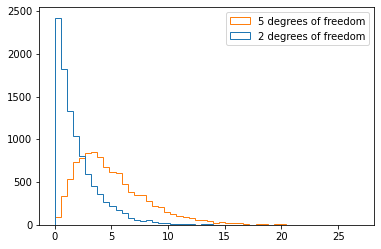

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')

###Hypothesis testing

In [20]:
from google.colab import files
files.upload() #subimos el archivo Ruta del proyecto /External Files/Introduction Data Analisis (necesario permitir las cookies)
df = pd.read_csv('/content/grades.csv')
df

Saving grades.csv to grades.csv


,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,DE88902E-C7A7-E37A-CFA7-F2C8F2D219F2,77.684611,2016-03-07 02:52:24.378000000,69.916150,2016-03-11 22:02:39.161000000,69.916150,2016-03-17 07:30:09.261000000,69.916150,2016-03-18 18:01:24.525000000,55.932920,2016-03-20 06:38:12.120000000,50.339628,2016-03-25 11:00:06.923000000
2311,DE88902E-C7A7-E37A-CFA7-F2C8F2D219F2,75.367870,2015-11-29 02:43:27.932000000,59.934296,2015-12-03 05:30:39.218000000,48.687437,2015-12-09 15:56:44.895000000,43.008693,2015-12-13 06:18:01.342000000,38.707824,2015-12-20 02:39:39.248000000,38.707824,2015-12-22 13:34:42.931000000
2312,EFDA9F93-D0C3-864F-B0F6-2E9AA3E05E31,73.269463,2015-10-20 08:09:27.418000000,58.255570,2015-11-18 19:07:06.930000000,58.955570,2015-12-10 08:54:54.871000000,52.250013,2015-11-23 19:40:00.434000000,41.800010,2015-11-29 14:23:43.659000000,41.800010,2015-12-04 09:56:07.156000000
2313,1F51E050-78F7-F270-1B90-ED1BC0376763,87.268366,2016-04-03 09:04:51.646000000,87.268366,2016-04-08 19:24:29.095000000,87.268366,2016-04-12 05:43:33.853000000,69.814693,2016-04-14 10:43:58.104000000,55.851754,2016-04-19 05:37:19.322000000,55.851754,2016-04-23 03:44:06.813000000


In [22]:
#separamos el conjunto de datos
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [23]:
#pandas por defecto no tiene en cuenta las columnas de fecha
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [24]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

Hipotesis: las dos poblaciones son iguales

In [25]:
from scipy import stats
stats.ttest_ind?

In [26]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])  

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [27]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [28]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)